In [1]:
import nltk
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords

%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\luyil\Downloads\archive (4)\IMDB Dataset.csv")
data.head(), data.shape

(                                              review sentiment
 0  One of the other reviewers has mentioned that ...  positive
 1  A wonderful little production. <br /><br />The...  positive
 2  I thought this was a wonderful way to spend ti...  positive
 3  Basically there's a family where a little boy ...  negative
 4  Petter Mattei's "Love in the Time of Money" is...  positive,
 (50000, 2))

<Axes: ylabel='sentiment'>

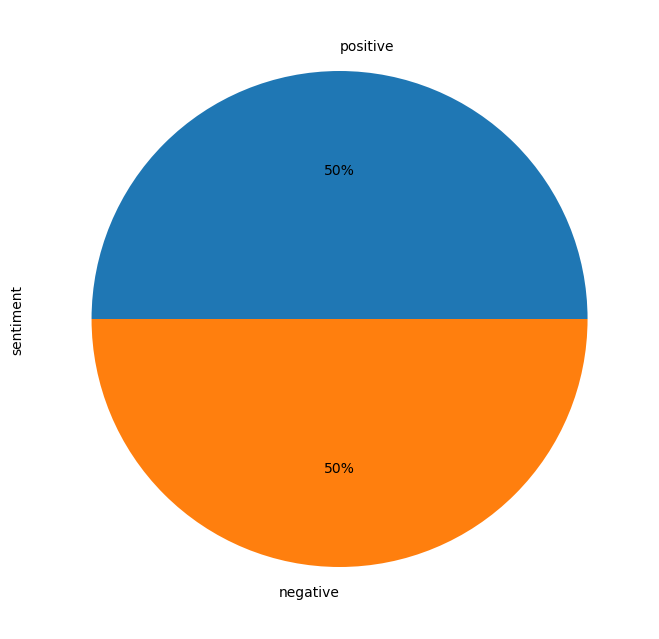

In [4]:
plt.rcParams["figure.figsize"] = [8,10]
data.sentiment.value_counts().plot(kind="pie",autopct="%1.0f%%")

In [5]:
X = data["review"]
y = data["sentiment"]

In [6]:
def clean_data(doc):
    document = re.sub("[^a-zA-Z]"," ",doc)
    document = re.sub(r"\s+[^a-zA-Z]\s"," ",document)
    document = re.sub(r"\s+"," ",document)
    return document

In [7]:
X_cleaned = []
reviews = list(X)
for r in reviews:
    X_cleaned.append(clean_data(r))

In [8]:
vectorizer = TfidfVectorizer(max_features=2500,min_df=5,max_df=0.7,stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(X_cleaned).toarray()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
rfc_clf = RandomForestClassifier(random_state=42,n_estimators=250)
classifier = rfc_clf.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'confusion_matrix' is not defined